In [46]:
# Import required libraries for data quality analysis

import pandas as pd      # For data frame manipulation and CSV reading
import numpy as np       # For numerical computations
import matplotlib.pyplot as plt  # For creating visualizations

# Display plots inline in the notebook
%matplotlib inline

# Additional plotting utilities
from matplotlib.backends.backend_pdf import PdfPages  # For saving multiple plots to PDF

In [ ]:
try:
    # Reading from a csv file, into a data frame
    df = pd.read_csv('../data/ppr-group-25200353-train.csv',
                    keep_default_na=True,
                    delimiter=',',
                    skipinitialspace=True)
    
    print(f"Successfully loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns")

    display(df.head(2))
    display(df.tail(2))
    
except FileNotFoundError:
    print("ERROR: The file '../data/ppr-group-25200353-train.csv' was not found.")
    print("Please ensure the file is in the current working directory.")
except Exception as e:
    print(f"ERROR: An unexpected error occurred: {e}")

Successfully loaded dataset with 54000 rows and 9 columns


,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,29/02/2016,"APT 14, RUSSELL COURT, FELTRIM RD",Dublin,NaN,"€118,487.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,08/07/2016,"19 PARK VILLAS, DEMESNE RD, DUNDALK",Louth,NaN,"€222,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,15/04/2016,"No 2 The Grove, Cahereen Heights, Castleisland",Kerry,NaN,"€123,348.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
3,21/12/2016,"APT 4 BLOCK 6, WOODFORD, WHEATON HALL",Louth,NaN,"€115,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,11/10/2016,"18 GERALDINE ST, DUBLIN 7, DUBLIN",Dublin,NaN,"€225,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN


,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
53995,05/01/2024,"BROCKA, BALLINDERRY, NENAGH",Tipperary,E45H500,"€497,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
53996,05/07/2024,"6 BEECHLAWN, SOUTH HILL AVE, BOOTERSTOWN",Dublin,A94P231,"€530,388.00",No,No,Second-Hand Dwelling house /Apartment,NaN
53997,19/07/2024,"2 MAIN ST, WHITEGATE, CORK",Cork,P25E5X4,"€200,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
53998,22/01/2024,"164 CLUAIN LARACH, KNOCKENDUFF, TRAMORE",Waterford,X91YN9W,"€360,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
53999,31/05/2024,"THE WILLOWS, FISHERSTOWN, CAMPILE",Wexford,Y34C597,"€349,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [ ]:
def build_numeric_dqr(df, columns, csv_filename):
    """
    
    """
    results = []

    total_count = len(df)

    for col in columns:
        series = df[col]

        count = total_count
        missing_pct = 100 * series.isna().sum() / total_count
        cardinality = series.nunique(dropna=True)

        min_val = series.min()
        q1 = series.quantile(0.25)
        mean = series.mean()
        median = series.median()
        q3 = series.quantile(0.75)
        max_val = series.max()
        std = series.std()

        results.append([
            col, count, missing_pct, cardinality,
            min_val, q1, mean, median, q3, max_val, std
        ])

    dqr_table = pd.DataFrame(results, columns=[
        "Feature",
        "Count",
        "Missing %",
        "Cardinality",
        "Minimum",
        "1st Quartile",
        "Mean",
        "Median",
        "3rd Quartile",
        "Maximum",
        "Standard Dev."
    ])

    dqr_table.to_csv(csv_filename, index=False)
    return dqr_table

In [49]:
def build_categorical_dqr(df, columns, csv_filename):
    """
    Build Data Quality Report table for categorical features.
    """

    results = []

    total_count = len(df)

    for col in columns:
        series = df[col]

        count = total_count
        missing_pct = 100 * series.isna().sum() / total_count
        cardinality = series.nunique(dropna=True)

        value_counts = series.value_counts(dropna=True)

        if len(value_counts) > 0:
            mode = value_counts.index[0]
            mode_freq = value_counts.iloc[0]
            mode_pct = 100 * mode_freq / total_count
        else:
            mode = np.nan
            mode_freq = 0
            mode_pct = 0

        if len(value_counts) > 1:
            second_mode = value_counts.index[1]
            second_mode_freq = value_counts.iloc[1]
            second_mode_pct = 100 * second_mode_freq / total_count
        else:
            second_mode = np.nan
            second_mode_freq = 0
            second_mode_pct = 0

        results.append([
            col, count, missing_pct, cardinality,
            mode, mode_freq, mode_pct,
            second_mode, second_mode_freq, second_mode_pct
        ])

    dqr_table = pd.DataFrame(results, columns=[
        "Feature",
        "Count",
        "Missing %",
        "Cardinality",
        "Mode",
        "Mode Freq.",
        "Mode %",
        "2nd Mode",
        "2nd Mode Freq.",
        "2nd Mode %"
    ])

    dqr_table.to_csv(csv_filename, index=False)
    return dqr_table

In [ ]:
# QUESTION: Does the loaded dataset have the expected structure?
# Validate that the dataframe has data and expected columns

print("Dataset Validation Checks:")
print("="*60)

# Check 1: Dataset is not empty
if df.empty:
    print("WARNING: Dataset is empty!")
else:
    print(f"Dataset contains {df.shape[0]:,} rows")

# Check 2: Check for duplicate rows
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f"WARNING: Found {duplicate_count} duplicate rows")
else:
    print("No duplicate rows found")

# Check 3: Check if all columns are unnamed
unnamed_cols = [col for col in df.columns if 'Unnamed' in str(col)]
if unnamed_cols:
    print(f"WARNING: Found {len(unnamed_cols)} unnamed columns: {unnamed_cols}")
else:
    print("All columns have names")

# Check 4: Basic column overview
print(f"\nDataset has {df.shape[1]} columns:")
print(f"  - Column names: {list(df.columns)}")

Dataset Validation Checks:
✓ Dataset contains 54,000 rows
⚠ WARNING: Found 8 duplicate rows
All columns have names

Dataset has 9 columns:
  - Column names: ['Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Eircode', 'Price (€)', 'Not Full Market Price', 'VAT Exclusive', 'Description of Property', 'Property Size Description']


In [51]:
# QUESTION: What are the dimensions of our dataset? How many rows and columns?
# Check how many rows and columns this dataframe has
print(f"Dataset shape: {df.shape}")
print(f"Number of rows (instances): {df.shape[0]}")
print(f"Number of columns (features): {df.shape[1]}")

Dataset shape: (54000, 9)
Number of rows (instances): 54000
Number of columns (features): 9


In [52]:
# QUESTION: What is the complete information about the dataframe including non-null counts and memory usage?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date of Sale (dd/mm/yyyy)  54000 non-null  object
 1   Address                    54000 non-null  object
 2   County                     54000 non-null  object
 3   Eircode                    16897 non-null  object
 4   Price (€)                  54000 non-null  object
 5   Not Full Market Price      54000 non-null  object
 6   VAT Exclusive              54000 non-null  object
 7   Description of Property    54000 non-null  object
 8   Property Size Description  2799 non-null   object
dtypes: object(9)
memory usage: 3.7+ MB


### Correcting Feature Data Types

Some features were incorrectly classified. Specifically:
- **Price (€)**: Should be numerical (remove the price formatting)
- **County**: Low cardinality (categorical)
- **Not Full Market Price/VAT Exclusive**: Yes/No options should be categorical
- **Description of Property/Property Size Description**: Low cardinality, suggesting it could be categorical

| Feature | Type Correction |
----------|-----------------|
|Date of Sale (dd/mm/yyyy)  | object |
|Address                    | object |
|County                     | object -> categorical |
|Eircode                    | object |
|Price (€)                  | object -> numeric |
|Not Full Market Price      | object -> categorical |
|VAT Exclusive              | object -> categorical |
|Description of Property    | object -> categorical |
|Property Size Description  | object -> categorical |

In [53]:
# Fixing Price ==================================================

try:
    # remove euro symbol
    df['Price (€)'] = df['Price (€)'].str.replace('€', '', regex=False)
    
    # remove commas
    df['Price (€)'] = df['Price (€)'].str.replace(',', '', regex=False)
    
    # convert string to float (numeric)
    df['Price (€)'] = pd.to_numeric(df['Price (€)'])
    print("feature 'Price (€)' corrected.")
except AttributeError:
    print("'Price (€)' is correctly formatted.")

# Extracting Date ======================================================

# Convert the Time column to datetime format
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'], dayfirst=True)
    

# Converting to Categorical ==================================================

df['County'] = df['County'].astype('category')
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')
df['Description of Property'] = df['Description of Property'].astype('category')
df['Property Size Description'] = df['Property Size Description'].astype('category')

print("Updated features to be categorical.")


feature 'Price (€)' corrected.
Updated features to be categorical.


In [54]:
# QUESTION: What is the complete information about the dataframe including non-null counts and memory usage?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date of Sale (dd/mm/yyyy)  54000 non-null  datetime64[ns]
 1   Address                    54000 non-null  object        
 2   County                     54000 non-null  category      
 3   Eircode                    16897 non-null  object        
 4   Price (€)                  54000 non-null  float64       
 5   Not Full Market Price      54000 non-null  category      
 6   VAT Exclusive              54000 non-null  category      
 7   Description of Property    54000 non-null  category      
 8   Property Size Description  2799 non-null   category      
dtypes: category(5), datetime64[ns](1), float64(1), object(2)
memory usage: 1.9+ MB


In [55]:
# QUESTION: Which features are numeric? Extract only numeric columns for separate analysis.
#Keep only the numeric features.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['Price (€)'], dtype='object')

In [56]:
# QUESTION: What do all the categorical features look like together?
#Look at the categorical features only
category_columns = df.select_dtypes(['category']).columns
category_columns

Index(['County', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [57]:
# QUESTION: How many unique values (cardinality) does each numeric feature have?

for column in numeric_columns:
    print(f"\nFeature: {column}") 
    print(f"Number of distinct categories: {len(df[column].unique())}")
    print(f"Unique values: {df[column].unique()}")
    


Feature: Price (€)
Number of distinct categories: 6788
Unique values: [118487.   222000.   123348.   ... 352570.37 149981.   530388.  ]


In [58]:
# QUESTION: What are the summary statistics (mean, std, min, max, quartiles) for numeric features?
# Descriptive stats for continuous features
# df.describe() by default only prints stats for the numeric columns int64 and float64.
# Often we need to change the feature data type so it more appropriately reflects whether this is 
# a continuous or a categorical feature.
pd.set_option("display.precision", 2)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date of Sale (dd/mm/yyyy),54000,2020-07-18 15:05:55.200000,2016-01-04 00:00:00,2018-04-25 00:00:00,2020-08-14 00:00:00,2022-10-18 00:00:00,2024-12-31 00:00:00,NaN
Price (€),54000.0,327020.43,5260.0,158590.31,251982.0,365000.0,135859819.26,1108049.47


In [59]:
df.to_csv('../data/housing-prices.csv')

In [60]:
# create data quality report tables
df_numeric_dqr = build_numeric_dqr(
    df,
    numeric_columns,
    '../data/housing-prices-numeric-features.csv'
)
display(df_numeric_dqr)

df_categorical_dqr = build_categorical_dqr(
    df,
    category_columns,
    '../data/housing-prices-categorical-features.csv'
)
display(df_categorical_dqr)

,Feature,Count,Missing %,Cardinality,Minimum,1st Quartile,Mean,Median,3rd Quartile,Maximum,Standard Dev.
0,Price (€),54000,0.0,6788,5260.0,158590.31,327020.43,251982.0,365000.0,1.36e+08,1.11e+06


,Feature,Count,Missing %,Cardinality,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,County,54000,0.00,26,Dublin,16577,30.70,Cork,6040,11.19
1,Not Full Market Price,54000,0.00,2,No,51150,94.72,Yes,2850,5.28
2,VAT Exclusive,54000,0.00,2,No,44530,82.46,Yes,9470,17.54
3,Description of Property,54000,0.00,3,Second-Hand Dwelling house /Apartment,44366,82.16,New Dwelling house /Apartment,9631,17.84
4,Property Size Description,54000,94.82,4,greater than or equal to 38 sq metres and less...,2088,3.87,greater than or equal to 125 sq metres,493,0.91


# Price over time

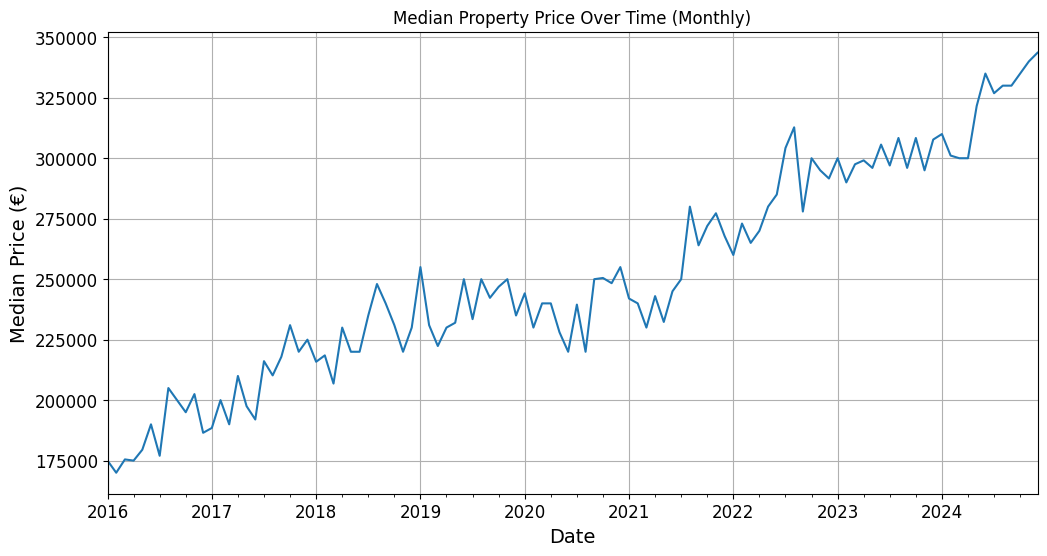

In [61]:
# Ensure sorted by date
df = df.sort_values('Date of Sale (dd/mm/yyyy)')

try:
    # Set date as index
    df.set_index('Date of Sale (dd/mm/yyyy)', inplace=True)
except:
    pass

monthly_median = df['Price (€)'].resample('ME').median()

plt.figure(figsize=(12,6))
monthly_median.plot()

plt.title('Median Property Price Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Median Price (€)')
plt.grid(True)
plt.show()

# Numerical Features Histogram/Boxplots

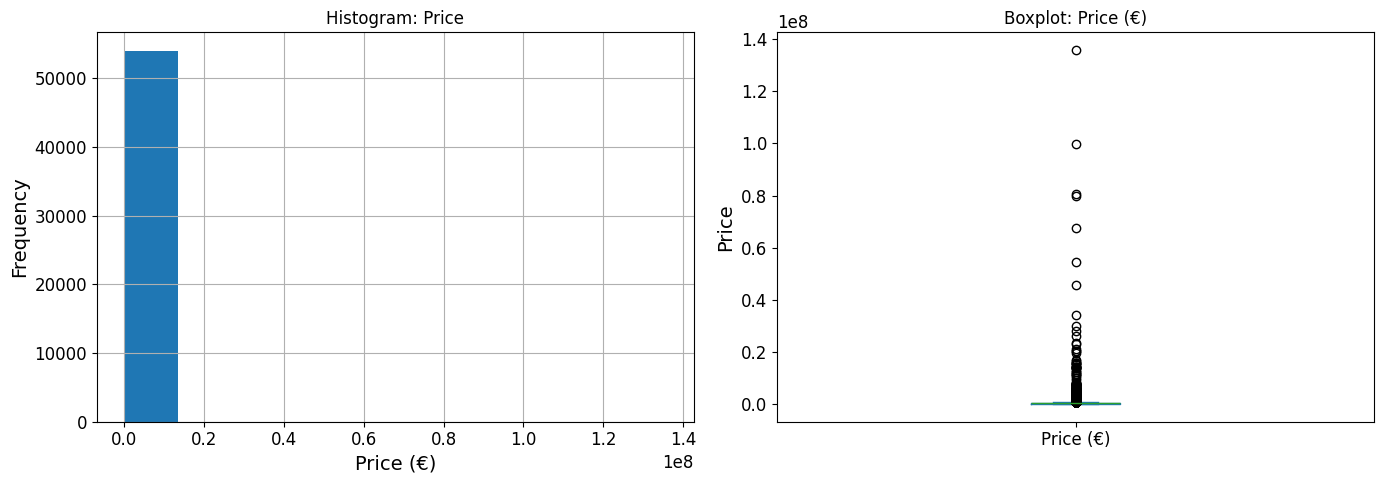

In [62]:
# Create subplots for histogram and boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
df['Price (€)'].hist(ax=axes[0])
axes[0].set_title('Histogram: Price')
axes[0].set_xlabel('Price (€)')
axes[0].set_ylabel('Frequency')

# Boxplot
df['Price (€)'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot: Price (€)')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

### Visualizing Categorical Features

**Bar plots** show the frequency distribution of categorical variables. Look for:
- Imbalanced categories (one category dominates)
- Rare categories (categories with very few examples)
- Missing values (shown if `dropna=False`)

These insights help us decide whether to combine categories, remove rare ones, or impute missing values.

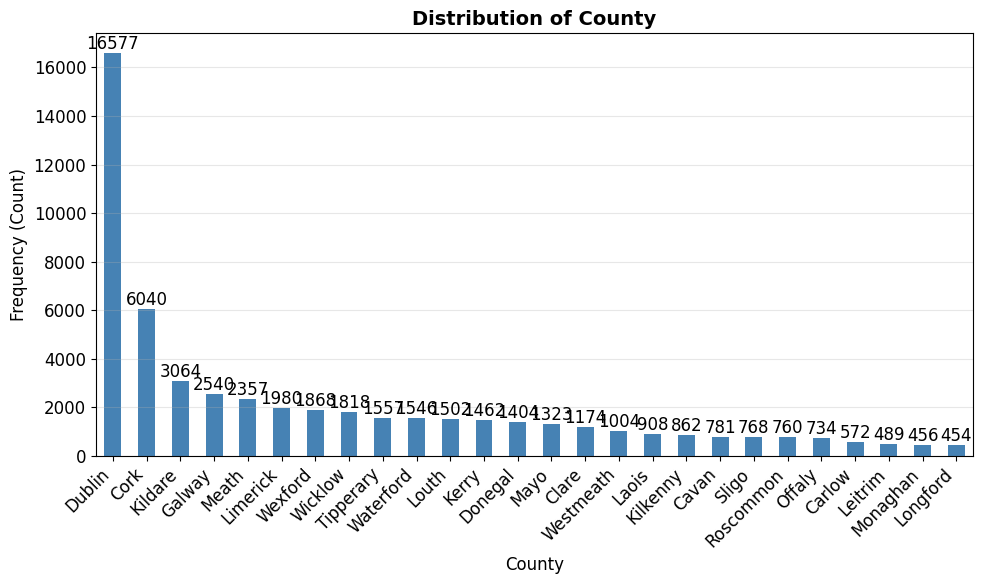

In [63]:
plt.figure(figsize=(10, 6))
ax = df['County'].value_counts(dropna=False).plot(kind='bar', color='steelblue')
plt.title('Distribution of County', fontsize=14, fontweight='bold')
plt.xlabel('County', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

# PDF pages of all categorical features

In [64]:
# Set plot styling for readability
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

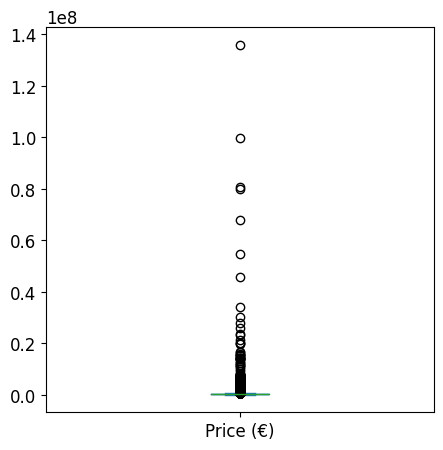

In [65]:
# One boxplot per numeric feature, saved to a single PDF
pp = PdfPages('housing-prices-numerical-features_boxplots.pdf')

for col in numeric_columns:
    f = df[col].plot(kind='box', figsize=(5,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

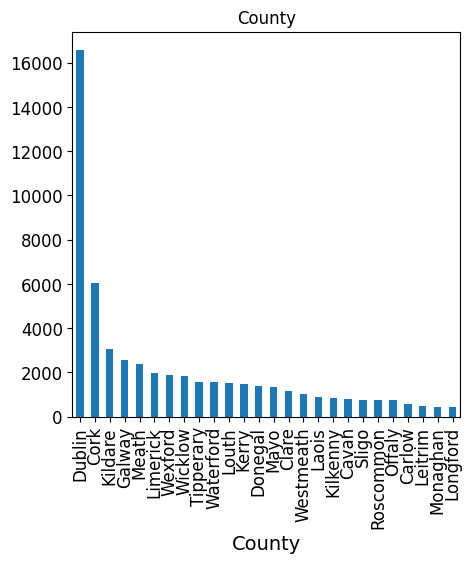

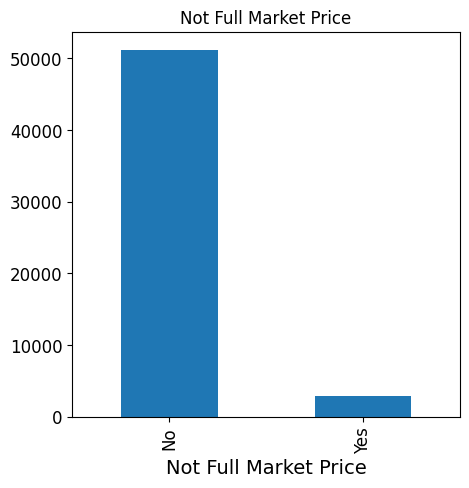

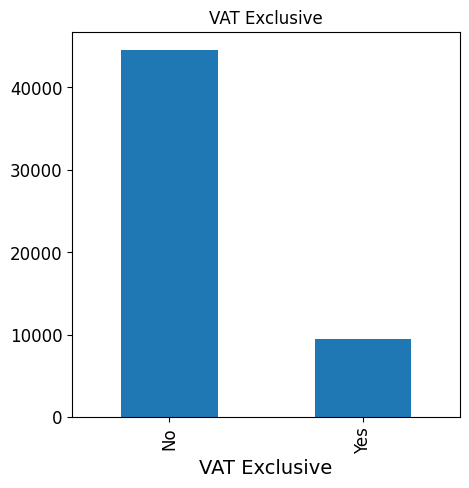

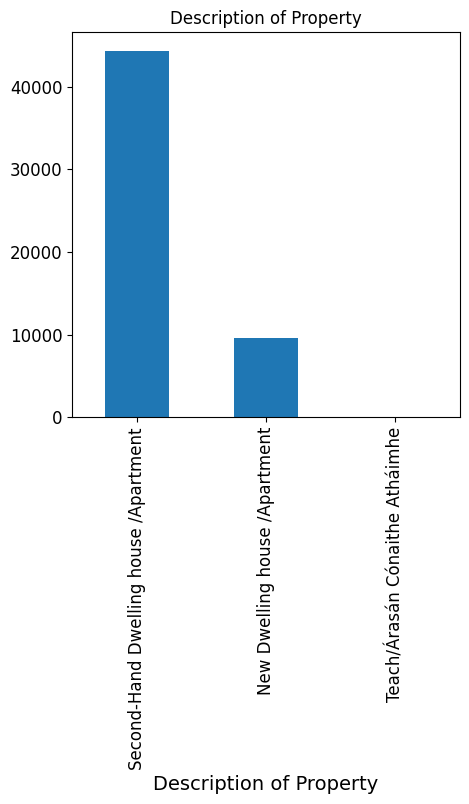

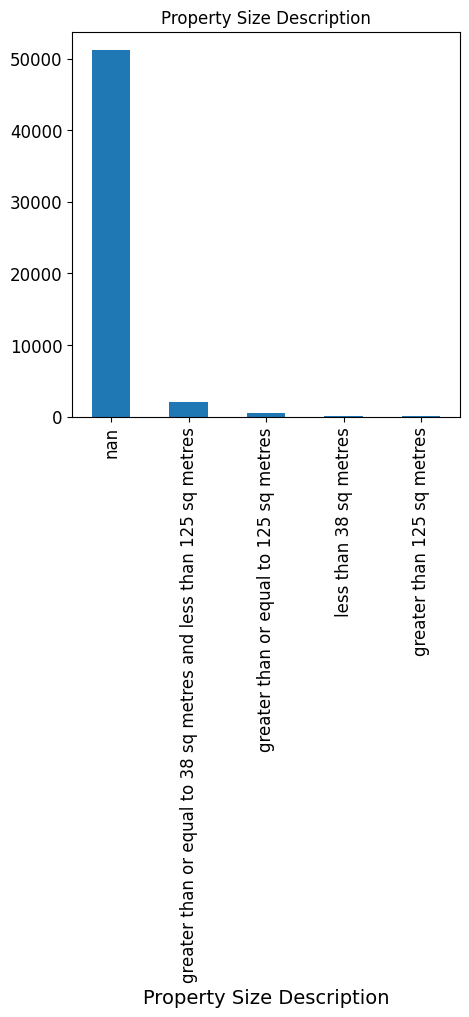

In [66]:
# Bar charts for all categorical features (saved to a single PDF)
# dropna=False keeps missing values visible
pp = PdfPages('housing-prices-categorical-features_barcharts.pdf')

for column in category_columns:
    f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(5,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

In [67]:
df.nlargest(5, 'Price (€)')

,Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
Date of Sale (dd/mm/yyyy),,,,,,,,
2022-12-07,"Apartment Development, at Castleview, Carriglea",Dublin,NaN,1.36e+08,No,Yes,New Dwelling house /Apartment,NaN
2020-02-27,"189 APARTMENTS AT ELMFIELD, BALLYOGAN, DUBLIN 18",Dublin,NaN,9.98e+07,No,No,Second-Hand Dwelling house /Apartment,NaN
2022-04-08,"Student Accommodation Building, 35-38 Cork Street",Dublin,NaN,8.07e+07,No,No,Second-Hand Dwelling house /Apartment,NaN
2024-06-27,"Blocks 5A-5D (including basement), Belmayne Av...",Dublin,NaN,7.97e+07,No,Yes,New Dwelling house /Apartment,NaN
2018-04-27,"1 THE ELYSIAN, EGLINTON STREET, CORK",Cork,NaN,6.77e+07,No,No,Second-Hand Dwelling house /Apartment,NaN


# Data Quality Report

## Issues

1. Duplicate Rows
2. The great majority of Property Size Description is null
3. Heavy-tailed distribution in Price
4. Teach/Árasán Cónaithe Athláimhe seems to be a translation of Second-Hand Dwelling house/Apartment
